In [74]:
import ml_utils as mt
import pandas as pd

In [75]:
df = pd.read_csv('Amazon_Product.csv')

In [76]:
df.shape

(50000, 16)

In [77]:
df.isnull().sum()

User_ID                0
Product_ID             0
Review_Text            0
Rating                 0
Is_Fake                0
Timestamp              0
User_Location          0
Product_Category       0
User_Reputation        0
Review_Length          0
Review_Verified        0
Helpful_Votes          0
Sentiment_Score        0
Device_Used            0
User_Activity_Level    0
Language               0
dtype: int64

In [78]:
df['Language'].value_counts()

Language
fr    10209
en    10099
de    10040
ca     6392
es     5234
hi     5034
it     1422
pt     1146
ro      409
et       13
nl        2
Name: count, dtype: int64

In [79]:
df = df[df['Language'] == 'en']

In [80]:
df.shape

(10099, 16)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10099 entries, 0 to 49994
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   User_ID              10099 non-null  int64 
 1   Product_ID           10099 non-null  int64 
 2   Review_Text          10099 non-null  object
 3   Rating               10099 non-null  int64 
 4   Is_Fake              10099 non-null  bool  
 5   Timestamp            10099 non-null  object
 6   User_Location        10099 non-null  object
 7   Product_Category     10099 non-null  object
 8   User_Reputation      10099 non-null  int64 
 9   Review_Length        10099 non-null  int64 
 10  Review_Verified      10099 non-null  bool  
 11  Helpful_Votes        10099 non-null  int64 
 12  Sentiment_Score      10099 non-null  object
 13  Device_Used          10099 non-null  object
 14  User_Activity_Level  10099 non-null  object
 15  Language             10099 non-null  object
dtypes: bool(2

In [82]:
df.head(5)

,User_ID,Product_ID,Review_Text,Rating,Is_Fake,Timestamp,User_Location,Product_Category,User_Reputation,Review_Length,Review_Verified,Helpful_Votes,Sentiment_Score,Device_Used,User_Activity_Level,Language
0,5724,451,Terrible product. It broke after one use.,4,False,2023-12-19,"Sydney, China",Electronics,310,7,False,83,Neutral,Mobile,High,en
1,9974,122,Front position walk less. Tell administration ...,3,True,2023-04-02,"Berlin, Japan",Home,45,18,False,90,Positive,Tablet,High,en
3,6712,201,Explain evidence figure effort. Radio explain ...,3,True,2020-10-17,"New York, Canada",Toys,296,27,False,95,Neutral,Mobile,Medium,en
5,4671,379,"The quality is good, but delivery was delayed.",5,False,2021-11-15,"Mumbai, China",Toys,26,8,False,7,Negative,Desktop,High,en
13,5525,125,Other all clearly think no. Blood until respon...,3,True,2022-04-05,"Sydney, France",Home,213,20,False,91,Negative,Tablet,Medium,en


In [83]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,10099.0,5032.000594,2875.626149,1.0,2587.0,5048.0,7509.5,10000.0
Product_ID,10099.0,252.927419,144.290939,1.0,128.0,255.0,379.0,500.0
Rating,10099.0,3.734825,1.315834,1.0,3.0,4.0,5.0,5.0
User_Reputation,10099.0,256.034855,141.985901,10.0,134.0,257.0,379.0,500.0
Review_Length,10099.0,14.757204,8.248773,4.0,7.0,10.0,23.0,34.0
Helpful_Votes,10099.0,49.722250,28.927375,0.0,25.0,50.0,74.0,100.0


In [84]:
# // 0   User_ID              10099 non-null  int64 
# // 1   Product_ID           10099 non-null  int64 
# // 2   Review_Text          10099 non-null  object
# // 3   Rating               10099 non-null  int64 
#  4   Is_Fake              10099 non-null  bool  
#  5   Timestamp            10099 non-null  object
#  6   User_Location        10099 non-null  object
#  7   Product_Category     10099 non-null  object
# // 8   User_Reputation      10099 non-null  int64 
# // 9   Review_Length        10099 non-null  int64 
# // 10  Review_Verified      10099 non-null  bool  
# // 11  Helpful_Votes        10099 non-null  int64 
#  12  Sentiment_Score      10099 non-null  object
#  13  Device_Used          10099 non-null  object
#  14  User_Activity_Level  10099 non-null  object

In [85]:
def user_activity_level(original_column):
    dir = {
        'Low': 0,
        'Medium': 1,
        'High': 2
    }
    
    return original_column.map(dir)

In [86]:
def device_used(original_column):
    dir = {
        'Mobile': 0,
        'Desktop': 1,
        'Tablet': 2
    }
    
    return original_column.map(dir)

In [87]:
# cat_to_dummies=None,
# cat_to_num=None,
simple_num = ['Review_Text', 'Rating', 'User_Reputation', 'Review_Length', 'Review_Verified', 'Helpful_Votes']
custom_func_dict = {
    'Device_Used' : device_used,
    'User_Activity_Level' : user_activity_level
    }
# date_diffs=None,
# date_components=None,
text_feat = ['Review_Text']

In [88]:
data_pipe = mt.DataPipe(simple_num=simple_num,
                       custom_func_dict=custom_func_dict,
                       text_feat=text_feat)

In [89]:
data_pipe.fit(df)

d:\Programming\IdentifyFakeProductReview\Version1.0\ml_utils.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[col]=self.col_func_dict[col](x[col])
d:\Programming\IdentifyFakeProductReview\Version1.0\ml_utils.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[col]=self.col_func_dict[col](x[col])


In [90]:
X = data_pipe.transform(df)
y = df['Is_Fake'].values

d:\Programming\IdentifyFakeProductReview\Version1.0\ml_utils.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[col]=self.col_func_dict[col](x[col])
d:\Programming\IdentifyFakeProductReview\Version1.0\ml_utils.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[col]=self.col_func_dict[col](x[col])


In [91]:
X.columns
X.drop(['Review_Text'], axis=1, inplace=True)

In [92]:
X.head(5)

,Rating,User_Reputation,Review_Length,Review_Verified,Helpful_Votes,Device_Used,User_Activity_Level,Review_Text_affect,Review_Text_age,Review_Text_agent,...,Review_Text_wear,Review_Text_wide,Review_Text_wife,Review_Text_win,Review_Text_wind,Review_Text_woman,Review_Text_writer,Review_Text_yard,Review_Text_yeah,Review_Text_year
0,4,310,7,False,83,0,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,45,18,False,90,2,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,296,27,False,95,0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,26,8,False,7,1,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,213,20,False,91,2,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Training Data Shape: (6059, 207)
Testing Data Shape: (4040, 207)


In [94]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()
model1.fit(X_train, y_train)

print("Model trained successfully!")


Model trained successfully!


c:\Users\mradu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [95]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model1.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9985148514851485
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00      1973
        True       1.00      1.00      1.00      2067

    accuracy                           1.00      4040
   macro avg       1.00      1.00      1.00      4040
weighted avg       1.00      1.00      1.00      4040



In [96]:
train_acc = model1.score(X_train, y_train)
test_acc = model1.score(X_test, y_test)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


Train Accuracy: 0.9977
Test Accuracy: 0.9985


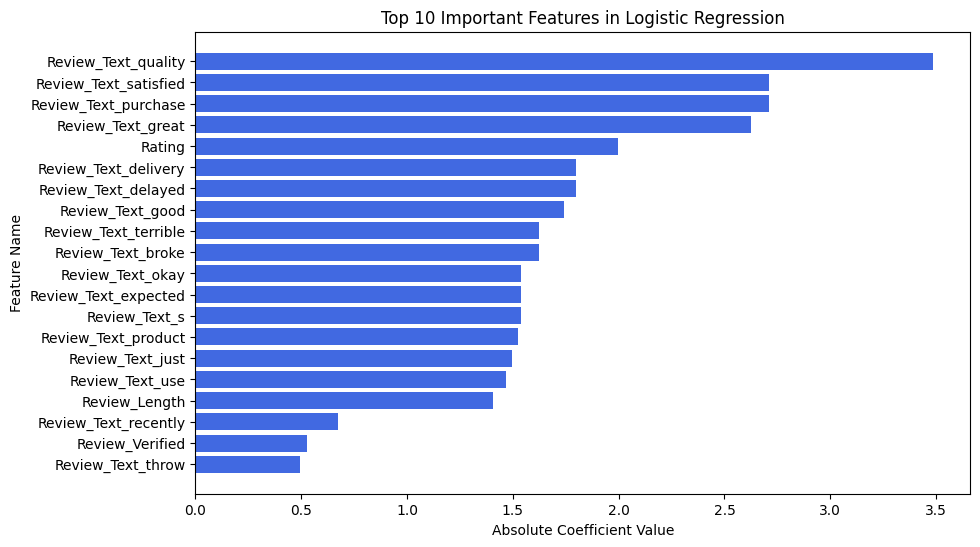

In [97]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature importance (coefficients)
feature_importance = model1.coef_[0]
feature_names = X_train.columns

# Sort feature importance
sorted_idx = np.argsort(np.abs(feature_importance))[::-1]
sorted_features = np.array(feature_names)[sorted_idx]
sorted_importance = np.abs(feature_importance)[sorted_idx]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_features[:20], sorted_importance[:20], color='royalblue')
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Feature Name")
plt.title("Top 10 Important Features in Logistic Regression")
plt.gca().invert_yaxis()
plt.show()


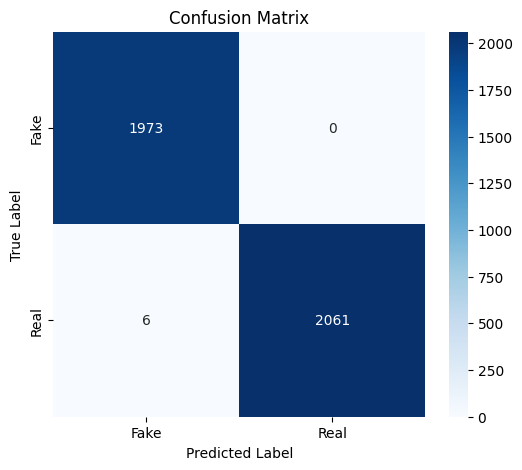

In [98]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


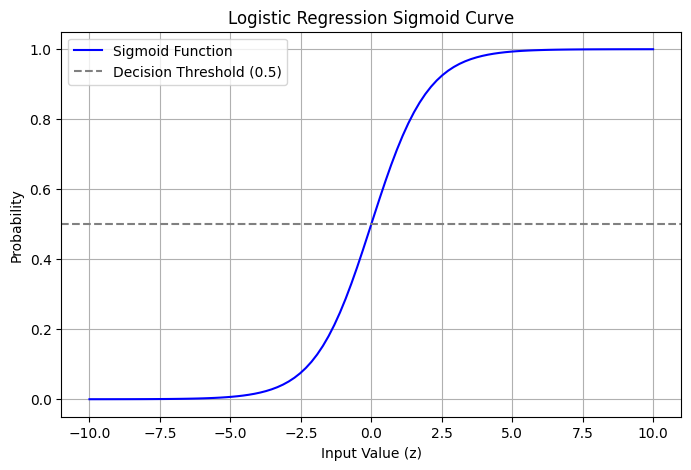

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit

def plot_logistic_function():
    x = np.linspace(-10, 10, 100)
    y = expit(x)  # Sigmoid function
    
    plt.figure(figsize=(8, 5))
    plt.plot(x, y, label="Sigmoid Function", color='b')
    plt.axhline(0.5, linestyle="--", color="gray", label="Decision Threshold (0.5)")
    plt.xlabel("Input Value (z)")
    plt.ylabel("Probability")
    plt.title("Logistic Regression Sigmoid Curve")
    plt.legend()
    plt.grid()
    plt.show()

plot_logistic_function()


In [100]:
import pandas as pd

def predict_review_LR(
    model, review_text, rating, user_reputation, review_length,
    helpful_votes, review_verified,
    device_used, user_activity_level, data_pipeline
):
    # Convert input into a DataFrame
    input_data = pd.DataFrame(
        [[review_text, rating, user_reputation, review_length, helpful_votes, review_verified, device_used, user_activity_level]],
        columns=["Review_Text", "Rating", "User_Reputation", "Review_Length", "Helpful_Votes",
                 "Review_Verified", "Device_Used", "User_Activity_Level"]
    )

    # Transform input using the same pipeline as training
    processed_input = data_pipeline.transform(input_data)
    processed_input.drop(['Review_Text'], axis=1, inplace=True)
    # Predict
    prob_fake, prob_real = model.predict_proba(processed_input)[0]
    print(f"Probability (Fake): {prob_fake:.4f}, Probability (Real): {prob_real:.4f}")


In [101]:
review_text = input("Enter the review: ")
rating = int(input("Enter rating (1-5): "))
user_reputation = int(input("Enter user reputation score: (10-500)"))
review_length = len(review_text.split())
helpful_votes = int(input("Enter number of helpful votes: (0-100) "))
review_verified = bool(input("Is the review verified? (1 for Yes, 0 for No): "))

device_used = input("Enter device used (Mobile, Desktop, Tablet) : ")
user_activity_level = input("Enter user activity level (Low, Medium, High) : ")

predict_review(
    model1, review_text, rating, user_reputation, review_length,
    helpful_votes, review_verified,
    device_used, user_activity_level, data_pipe
)

ValueError: invalid literal for int() with base 10: ''

## Using Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [ ]:
params={
        'max_depth':[None,5,6,7,8,10,15,20,30,50], # 10
        'min_samples_leaf':[1,2,5,10,15,20], # 6
        'min_samples_split':[2,5,10,15,20] # 5
        }

In [ ]:
model2 = RandomForestClassifier(random_state=42)

In [ ]:
gridearch = RandomizedSearchCV(
    model2,
    params,
    n_iter=10,
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

In [ ]:
gridearch.fit(X_train, y_train)
print("Best Parameters:", gridearch.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'min_samples_split': 15, 'min_samples_leaf': 15, 'max_depth': 15}


In [ ]:
model2 = RandomForestClassifier(**gridearch.best_params_, random_state=42)
model2.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=15, min_samples_split=15,
                       random_state=42)

In [ ]:
model2.predict(X_test)
y_pred = model2.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00      1472
        True       1.00      1.00      1.00      1558

    accuracy                           1.00      3030
   macro avg       1.00      1.00      1.00      3030
weighted avg       1.00      1.00      1.00      3030



In [ ]:
print(X_train.shape, X_test.shape)  # Should not be identical
print(y_train.shape, y_test.shape)


(7069, 207) (3030, 207)
(7069,) (3030,)


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model2, X, y, cv=5)
print("Cross-validation scores:", scores.mean())


Cross-validation scores: 1.0


In [ ]:
print(set(y_train) & set(y_test))  # Should be empty


{np.False_, np.True_}


In [102]:
print(X_train.duplicated().sum(), X_test.duplicated().sum())

0 0


In [103]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y)
print(sorted(zip(mi_scores, X.columns), reverse=True)[:10])  # Top 10 features


[(np.float64(0.6636401953203453), 'Review_Length'), (np.float64(0.26622407170555307), 'Rating'), (np.float64(0.17054831104372514), 'Review_Text_quality'), (np.float64(0.16951907490211493), 'Review_Text_product'), (np.float64(0.08301154269644151), 'Review_Text_use'), (np.float64(0.0815385190171316), 'Review_Text_expected'), (np.float64(0.08082810211557856), 'Review_Text_just'), (np.float64(0.08078321645885755), 'Review_Text_purchase'), (np.float64(0.08011172140147171), 'Review_Text_highly'), (np.float64(0.07963506879125481), 'Review_Text_great')]


In [104]:
import pandas as pd

pd.Series(y).value_counts(normalize=True)


True     0.509951
False    0.490049
Name: proportion, dtype: float64

In [ ]:
import numpy as np

unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts / counts.sum())))


{np.False_: np.float64(0.4900485196554114), np.True_: np.float64(0.5099514803445886)}


In [105]:
duplicates = X.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 1


In [106]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)  # Remove features with variance < 0.01
X_reduced = selector.fit_transform(X)
print(f"Original shape: {X.shape}, New shape: {X_reduced.shape}")


Original shape: (10099, 207), New shape: (10099, 25)


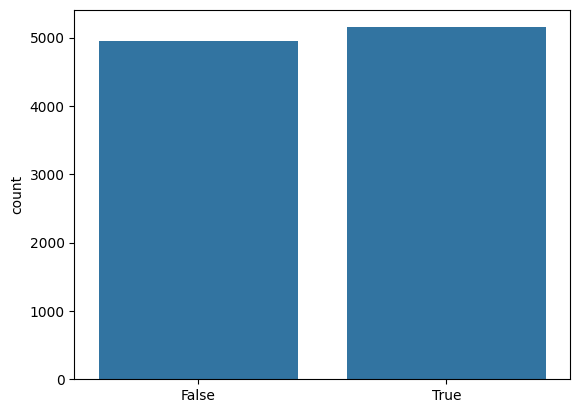

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y)
plt.show()


In [108]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [109]:
X.head(5)

,Rating,User_Reputation,Review_Length,Review_Verified,Helpful_Votes,Device_Used,User_Activity_Level,Review_Text_affect,Review_Text_age,Review_Text_agent,...,Review_Text_wear,Review_Text_wide,Review_Text_wife,Review_Text_win,Review_Text_wind,Review_Text_woman,Review_Text_writer,Review_Text_yard,Review_Text_yeah,Review_Text_year
0,4,310,7,False,83,0,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,45,18,False,90,2,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,296,27,False,95,0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,26,8,False,7,1,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,213,20,False,91,2,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
print(X.dtypes)


Rating                object
User_Reputation       object
Review_Length         object
Review_Verified       object
Helpful_Votes         object
                       ...  
Review_Text_woman     object
Review_Text_writer    object
Review_Text_yard      object
Review_Text_yeah      object
Review_Text_year      object
Length: 207, dtype: object


In [ ]:
import pandas as pd

# Check data types
print(X.dtypes)

# Convert numerical columns stored as object type
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')  # Convert to numeric (NaN if not possible)

# Drop rows with NaN (if necessary)
X.dropna(inplace=True)

# Check after conversion
print(X.dtypes)

Rating                object
User_Reputation       object
Review_Length         object
Review_Verified       object
Helpful_Votes         object
                       ...  
Review_Text_woman     object
Review_Text_writer    object
Review_Text_yard      object
Review_Text_yeah      object
Review_Text_year      object
Length: 207, dtype: object
Rating                  int64
User_Reputation         int64
Review_Length           int64
Review_Verified          bool
Helpful_Votes           int64
                       ...   
Review_Text_woman     float64
Review_Text_writer    float64
Review_Text_yard      float64
Review_Text_yeah      float64
Review_Text_year      float64
Length: 207, dtype: object


In [114]:
X.hist(figsize=(240, 160), bins=30)  # Plot histograms for each column
plt.show()

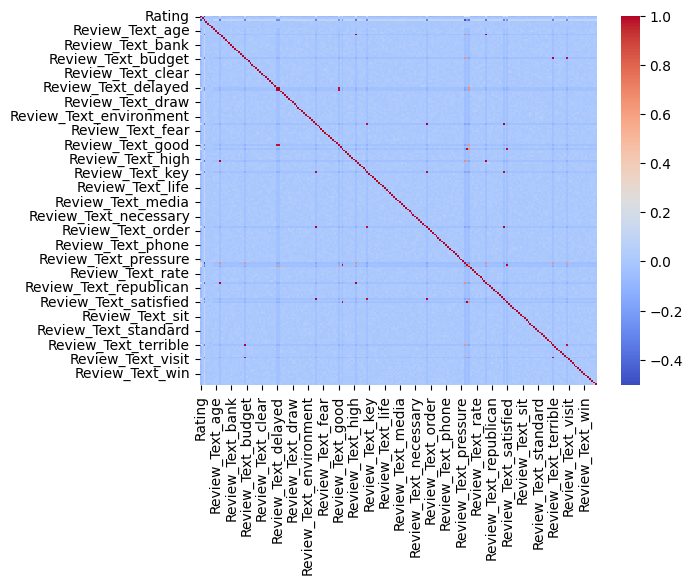

In [ ]:
import numpy as np

correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
plt.show()


In [ ]:
import scipy.stats as stats

train_mean = np.mean(X_train, axis=0)
test_mean = np.mean(X_test, axis=0)

stat, p_value = stats.ttest_ind(train_mean, test_mean)
print(f"P-value for train-test distribution difference: {p_value}")


ValueError: data type <class 'numpy.object_'> not inexact